In [4]:
%pylab inline
import pandas as pd
from glob import glob

Populating the interactive namespace from numpy and matplotlib


In [163]:
lme_result = pd.concat([pd.read_csv(f) for f in glob('lme_out*.csv')]) \
                .query('gene != "X1"').sort_values('gene').reset_index()
lm_result = pd.concat([pd.read_csv(f) for f in glob('lm_out*.csv')]) \
                .query('gene != "X1"').sort_values('gene').reset_index()
glm_result = pd.concat([pd.read_csv(f) for f in glob('glm_out*.csv')]) \
                .query('gene != "X1"').sort_values('gene').reset_index()

sum_lme_result = pd.concat([pd.read_csv(f) for f in glob('sum_lme_out*.csv')]) \
                    .sort_values('gene').reset_index()
sum_lm_result = pd.concat([pd.read_csv(f) for f in glob('sum_lm_out*.csv')]) \
                    .sort_values('gene').reset_index()
sum_glm_result = pd.concat([pd.read_csv(f) for f in glob('sum_glm_out*.csv')]) \
                    .sort_values('gene').reset_index()


# The LME effect size ended up being for control rather than stim
lme_result['effect_size'] = -lme_result['effect_size']
sum_lme_result['effect_size'] = -sum_lme_result['effect_size']

In [181]:
# The Poisson GLM had p-values of 0 for some genes. This is numerical issue, capping it to a small nonzero number
min_pval = glm_result.query('pval > 0')['pval'].min() / 2
glm_result.loc[glm_result.query('pval == 0').index, 'pval'] = min_pval

min_pval = sum_glm_result.query('pval > 0')['pval'].min() / 2
sum_glm_result.loc[sum_glm_result.query('pval == 0').index, 'pval'] = min_pval

In [165]:
metadata = pd.read_csv('../metadata.csv')

In [210]:
metadata.head()

,index,stim,sample,maintype,celltype,subtype,total_count,num_detected
0,x2_35_0_bc0019,0h,B1_1_0h,Excitatory,ExcL23,ExcL23_1,13385.0,4559
1,x2_35_0_bc0046,0h,B1_1_0h,Excitatory,ExcL23,ExcL23_1,11490.0,4026
2,x2_35_0_bc0047,0h,B1_1_0h,Excitatory,ExcL23,ExcL23_1,11450.0,4010
3,x2_35_0_bc0064,0h,B1_1_0h,Excitatory,ExcL23,ExcL23_1,11538.0,4034
4,x2_35_0_bc0065,0h,B1_1_0h,Excitatory,ExcL23,ExcL23_1,8696.0,3399


In [198]:
metadata.shape

(1856, 8)

In [200]:
metadata.groupby(['stim', 'sample']).count()[['index']].rename(columns={'index': 'Number of cells'})

Number of cells
stim sample                     
0h   B1_1_0h                 211
     B3_5_0h                  76
     B3_6_0h                  10
     B4_11_0h                137
     B4_12_0h                 58
     B5_13_0h                130
     B5_14_0h                 94
     B5_15_0h                332
     B5_16_0h                102
1h   B1_2_1h                  92
     B2_4_1h                 141
     B3_7_1h                  99
     B3_8_1h                  95
     B6_17_1h_A               72
     B6_17_1h_B               89
     B6_18_1h                 79
     B7_21_1h                 39

In [167]:
gene_list = ['Per1', 'Crem', 'Nr4a2', 'Nr4a1', 'Nr4a3',
             'Fosl2', 'Fos', 'Egr1', 'Atf3', 'Npas4',
             'Junb', 'Fosb', 'Egr4', 'Egr2']

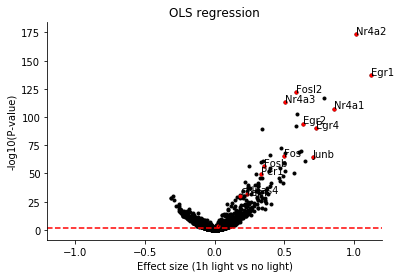

In [216]:
result_set = lm_result

plt.scatter(result_set['effect_size'], -np.log10(result_set['pval']), c='k', marker='.');

tmp = result_set.query('gene in @gene_list')
plt.scatter(tmp['effect_size'], -np.log10(tmp['pval']), c='r', marker='.');
for i, r in tmp.iterrows():
    plt.annotate(r.gene, (r.effect_size, -np.log10(r.pval)))

plt.axhline(-np.log10(0.05), ls='--', c='r')
plt.xlabel('Effect size (1h light vs no light)')
plt.ylabel('-log10(P-value)')

plt.title('OLS regression')
plt.xlim(-1.2, 1.2);

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

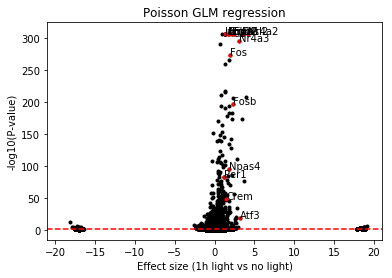

In [186]:
result_set = glm_result

plt.scatter(result_set['effect_size'], -np.log10(result_set['pval']), c='k', marker='.');

tmp = result_set.query('gene in @gene_list').dropna()
plt.scatter(tmp['effect_size'], -np.log10(tmp['pval']), c='r', marker='.');
for i, r in tmp.iterrows():
    plt.annotate(r.gene, (r.effect_size, -np.log10(r.pval)))

plt.axhline(-np.log10(0.05), ls='--', c='r')
plt.xlabel('Effect size (1h light vs no light)')
plt.ylabel('-log10(P-value)')

plt.title('Poisson GLM regression')
plt.xlim(-21, 21);

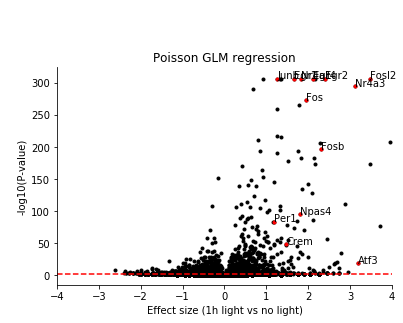

In [217]:
result_set = glm_result

plt.scatter(result_set['effect_size'], -np.log10(result_set['pval']), c='k', marker='.');

tmp = result_set.query('gene in @gene_list')
plt.scatter(tmp['effect_size'], -np.log10(tmp['pval']), c='r', marker='.');
for i, r in tmp.iterrows():
    plt.annotate(r.gene, (r.effect_size, -np.log10(r.pval)))

plt.axhline(-np.log10(0.05), ls='--', c='r')
plt.xlabel('Effect size (1h light vs no light)')
plt.ylabel('-log10(P-value)')

plt.title('Poisson GLM regression')
plt.xlim(-4, 4);

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

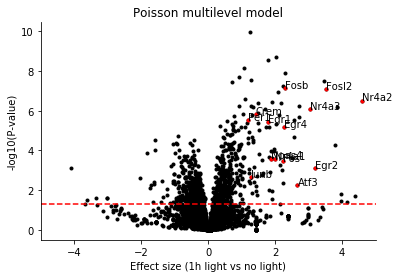

In [218]:
result_set = lme_result

plt.scatter(result_set['effect_size'], -np.log10(result_set['pval']), c='k', marker='.');

tmp = result_set.query('gene in @gene_list')
plt.scatter(tmp['effect_size'], -np.log10(tmp['pval']), c='r', marker='.');
for i, r in tmp.iterrows():
    plt.annotate(r.gene, (r.effect_size, -np.log10(r.pval)))
    
plt.axhline(-np.log10(0.05), ls='--', c='r')
plt.xlabel('Effect size (1h light vs no light)')
plt.ylabel('-log10(P-value)')

plt.title('Poisson multilevel model')
plt.xlim(-5, 5);

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

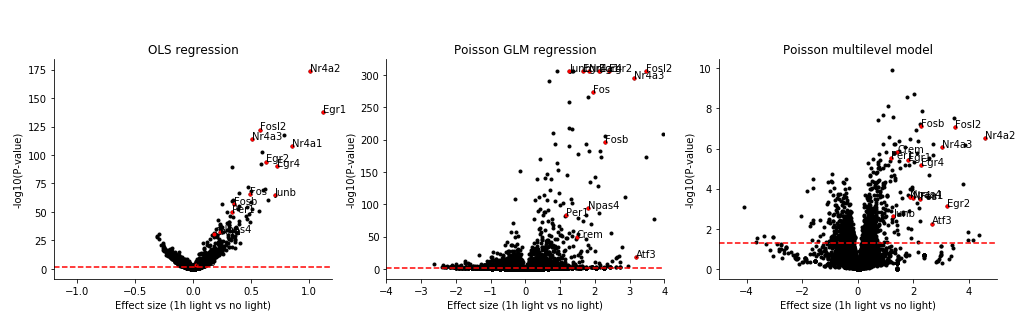

In [223]:
figsize(14, 4)

plt.subplot(1, 3, 1)

result_set = lm_result

plt.scatter(result_set['effect_size'], -np.log10(result_set['pval']), c='k', marker='.');

tmp = result_set.query('gene in @gene_list')
plt.scatter(tmp['effect_size'], -np.log10(tmp['pval']), c='r', marker='.');
for i, r in tmp.iterrows():
    plt.annotate(r.gene, (r.effect_size, -np.log10(r.pval)))

plt.axhline(-np.log10(0.05), ls='--', c='r')
plt.xlabel('Effect size (1h light vs no light)')
plt.ylabel('-log10(P-value)')

plt.title('OLS regression')
plt.xlim(-1.2, 1.2);

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.subplot(1, 3, 2)

result_set = glm_result

plt.scatter(result_set['effect_size'], -np.log10(result_set['pval']), c='k', marker='.');

tmp = result_set.query('gene in @gene_list')
plt.scatter(tmp['effect_size'], -np.log10(tmp['pval']), c='r', marker='.');
for i, r in tmp.iterrows():
    plt.annotate(r.gene, (r.effect_size, -np.log10(r.pval)))

plt.axhline(-np.log10(0.05), ls='--', c='r')
plt.xlabel('Effect size (1h light vs no light)')
plt.ylabel('-log10(P-value)')

plt.title('Poisson GLM regression')
plt.xlim(-4, 4);

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.subplot(1, 3, 3)

result_set = lme_result

plt.scatter(result_set['effect_size'], -np.log10(result_set['pval']), c='k', marker='.');

tmp = result_set.query('gene in @gene_list')
plt.scatter(tmp['effect_size'], -np.log10(tmp['pval']), c='r', marker='.');
for i, r in tmp.iterrows():
    plt.annotate(r.gene, (r.effect_size, -np.log10(r.pval)))
    
plt.axhline(-np.log10(0.05), ls='--', c='r')
plt.xlabel('Effect size (1h light vs no light)')
plt.ylabel('-log10(P-value)')

plt.title('Poisson multilevel model')
plt.xlim(-5, 5);

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

plt.tight_layout()

plt.savefig('DE_comparisons.png', bbox_inches='tight', dpi=200)

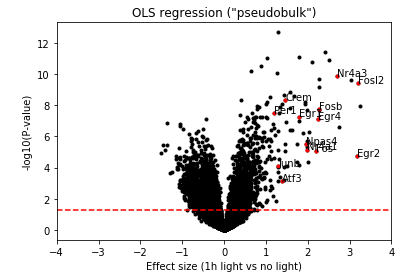

In [190]:
result_set = sum_lm_result

plt.scatter(result_set['effect_size'], -np.log10(result_set['pval']), c='k', marker='.');

tmp = result_set.query('gene in @gene_list')
plt.scatter(tmp['effect_size'], -np.log10(tmp['pval']), c='r', marker='.');
for i, r in tmp.iterrows():
    plt.annotate(r.gene, (r.effect_size, -np.log10(r.pval)))

plt.axhline(-np.log10(0.05), ls='--', c='r')
plt.xlabel('Effect size (1h light vs no light)')
plt.ylabel('-log10(P-value)')

plt.title('OLS regression ("pseudobulk")')
plt.xlim(-4, 4);

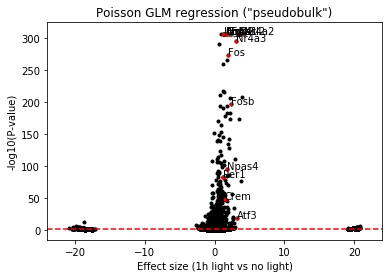

In [192]:
result_set = sum_glm_result

plt.scatter(result_set['effect_size'], -np.log10(result_set['pval']), c='k', marker='.');

tmp = result_set.query('gene in @gene_list').dropna()
plt.scatter(tmp['effect_size'], -np.log10(tmp['pval']), c='r', marker='.');
for i, r in tmp.iterrows():
    plt.annotate(r.gene, (r.effect_size, -np.log10(r.pval)))

plt.axhline(-np.log10(0.05), ls='--', c='r')
plt.xlabel('Effect size (1h light vs no light)')
plt.ylabel('-log10(P-value)')

plt.title('Poisson GLM regression ("pseudobulk")')
plt.xlim(-24, 24);

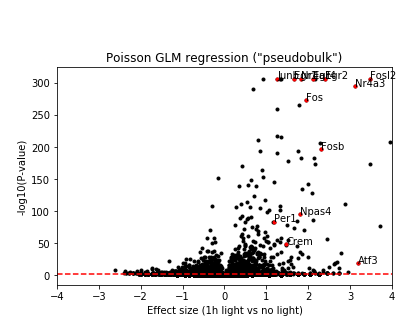

In [193]:
result_set = sum_glm_result

plt.scatter(result_set['effect_size'], -np.log10(result_set['pval']), c='k', marker='.');

tmp = result_set.query('gene in @gene_list')
plt.scatter(tmp['effect_size'], -np.log10(tmp['pval']), c='r', marker='.');
for i, r in tmp.iterrows():
    plt.annotate(r.gene, (r.effect_size, -np.log10(r.pval)))

plt.axhline(-np.log10(0.05), ls='--', c='r')
plt.xlabel('Effect size (1h light vs no light)')
plt.ylabel('-log10(P-value)')

plt.title('Poisson GLM regression ("pseudobulk")')
plt.xlim(-4, 4);

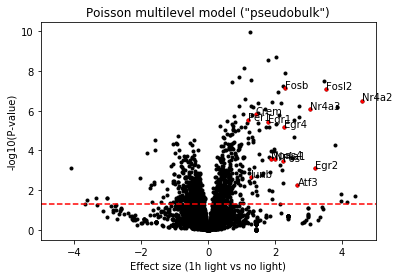

In [196]:
result_set = sum_lme_result

plt.scatter(result_set['effect_size'], -np.log10(result_set['pval']), c='k', marker='.');

tmp = result_set.query('gene in @gene_list')
plt.scatter(tmp['effect_size'], -np.log10(tmp['pval']), c='r', marker='.');
for i, r in tmp.iterrows():
    plt.annotate(r.gene, (r.effect_size, -np.log10(r.pval)))
    
plt.axhline(-np.log10(0.05), ls='--', c='r')
plt.xlabel('Effect size (1h light vs no light)')
plt.ylabel('-log10(P-value)')

plt.title('Poisson multilevel model ("pseudobulk")')
plt.xlim(-5, 5);

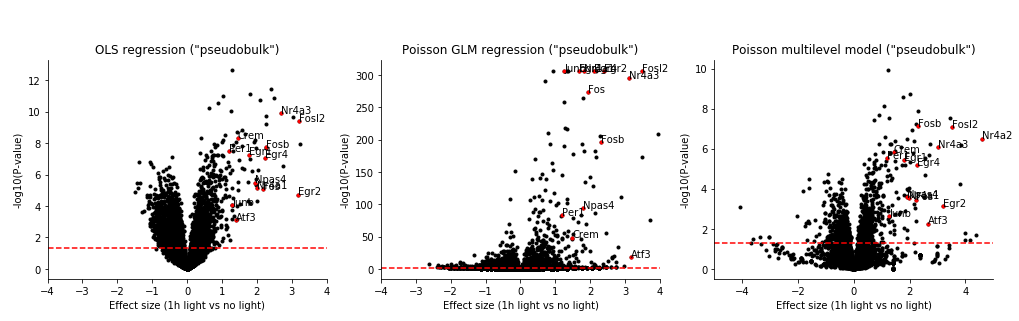

In [225]:
figsize(14, 4)

plt.subplot(1, 3, 1)

result_set = sum_lm_result

plt.scatter(result_set['effect_size'], -np.log10(result_set['pval']), c='k', marker='.');

tmp = result_set.query('gene in @gene_list')
plt.scatter(tmp['effect_size'], -np.log10(tmp['pval']), c='r', marker='.');
for i, r in tmp.iterrows():
    plt.annotate(r.gene, (r.effect_size, -np.log10(r.pval)))

plt.axhline(-np.log10(0.05), ls='--', c='r')
plt.xlabel('Effect size (1h light vs no light)')
plt.ylabel('-log10(P-value)')

plt.title('OLS regression ("pseudobulk")')
plt.xlim(-4, 4);

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

plt.subplot(1, 3, 2)

result_set = sum_glm_result

plt.scatter(result_set['effect_size'], -np.log10(result_set['pval']), c='k', marker='.');

tmp = result_set.query('gene in @gene_list')
plt.scatter(tmp['effect_size'], -np.log10(tmp['pval']), c='r', marker='.');
for i, r in tmp.iterrows():
    plt.annotate(r.gene, (r.effect_size, -np.log10(r.pval)))

plt.axhline(-np.log10(0.05), ls='--', c='r')
plt.xlabel('Effect size (1h light vs no light)')
plt.ylabel('-log10(P-value)')

plt.title('Poisson GLM regression ("pseudobulk")')
plt.xlim(-4, 4);

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

plt.subplot(1, 3, 3)

result_set = sum_lme_result

plt.scatter(result_set['effect_size'], -np.log10(result_set['pval']), c='k', marker='.');

tmp = result_set.query('gene in @gene_list')
plt.scatter(tmp['effect_size'], -np.log10(tmp['pval']), c='r', marker='.');
for i, r in tmp.iterrows():
    plt.annotate(r.gene, (r.effect_size, -np.log10(r.pval)))
    
plt.axhline(-np.log10(0.05), ls='--', c='r')
plt.xlabel('Effect size (1h light vs no light)')
plt.ylabel('-log10(P-value)')

plt.title('Poisson multilevel model ("pseudobulk")')
plt.xlim(-5, 5);

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

plt.tight_layout()

plt.savefig('pseudobulk_DE_comparisons.png', bbox_inches='tight', dpi=200)

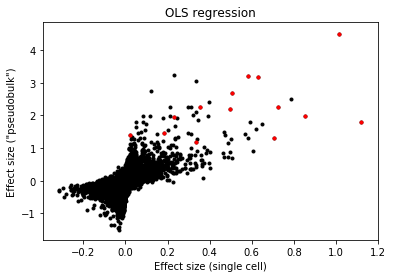

In [204]:
plt.scatter(lm_result.effect_size, sum_lm_result.effect_size, c='k', marker='.')

tmp = lm_result.query('gene in @gene_list')
sum_tmp = sum_lm_result.query('gene in @gene_list')
plt.scatter(tmp.effect_size, sum_tmp.effect_size, c='r', marker='.')

plt.title('OLS regression')
plt.xlabel('Effect size (single cell)')
plt.ylabel('Effect size ("pseudobulk")');

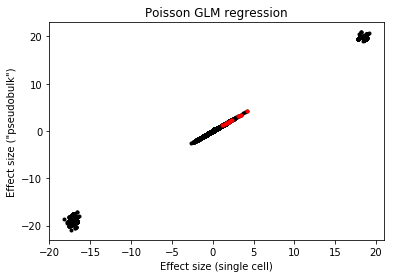

In [205]:
plt.scatter(glm_result.effect_size, sum_glm_result.effect_size, c='k', marker='.')

tmp = glm_result.query('gene in @gene_list')
sum_tmp = sum_glm_result.query('gene in @gene_list')
plt.scatter(tmp.effect_size, sum_tmp.effect_size, c='r', marker='.')

plt.title('Poisson GLM regression')
plt.xlabel('Effect size (single cell)')
plt.ylabel('Effect size ("pseudobulk")');

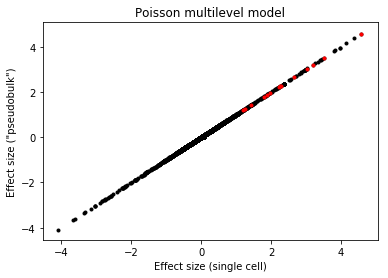

In [206]:
plt.scatter(lme_result.effect_size, sum_lme_result.effect_size, c='k', marker='.')

tmp = lme_result.query('gene in @gene_list')
sum_tmp = sum_lme_result.query('gene in @gene_list')
plt.scatter(tmp.effect_size, sum_tmp.effect_size, c='r', marker='.')

plt.title('Poisson multilevel model')
plt.xlabel('Effect size (single cell)')
plt.ylabel('Effect size ("pseudobulk")');

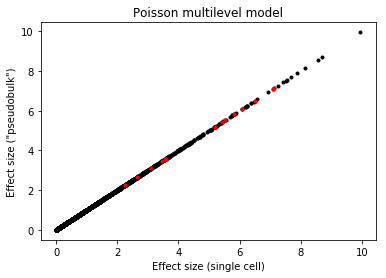

In [209]:
plt.scatter(-np.log10(lme_result.pval), -np.log10(sum_lme_result.pval), c='k', marker='.')

tmp = lme_result.query('gene in @gene_list')
sum_tmp = sum_lme_result.query('gene in @gene_list')
plt.scatter(-np.log10(tmp.pval), -np.log10(sum_tmp.pval), c='r', marker='.')

plt.title('Poisson multilevel model')
plt.xlabel('Effect size (single cell)')
plt.ylabel('Effect size ("pseudobulk")');